In [89]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

#📌 Extracción

In [109]:
# Configuración para mostrar todo
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [110]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Leer los datos desde la URL
response = requests.get(url)
data_json = response.json()

# Convertir a DataFrame
df = pd.DataFrame(data_json)

In [111]:
print("Información general del DataFrame:")
df.info()

print("\nTipos de datos de cada columna:")
print(df.dtypes)

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

Tipos de datos de cada columna:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


#🔧 Transformación

In [112]:
# Expandir columnas con diccionarios anidados
nested_cols = ['customer', 'phone', 'internet', 'account']
for col in nested_cols:
    expanded = pd.json_normalize(df[col])
    expanded.columns = [f"{col}_{subcol}" for subcol in expanded.columns]
    df = pd.concat([df.drop(columns=[col]), expanded], axis=1)

# Renombrar columnas para mayor claridad
df.rename(columns={
    "customer_gender": "Genero",
    "customer_SeniorCitizen": "EsAdultoMayor",
    "customer_Partner": "TienePareja",
    "customer_Dependents": "TieneDependientes",
    "customer_tenure": "MesesContrato",
    "phone_PhoneService": "TieneServicioTelefono",
    "phone_MultipleLines": "TieneMultiplesLineas",
    "internet_InternetService": "TieneServicioInternet",
    "internet_OnlineSecurity": "TieneSeguridadOnline",
    "internet_OnlineBackup": "TieneBackupOnline",
    "internet_DeviceProtection": "TieneProteccionDispositivo",
    "internet_TechSupport": "TieneSoporteTecnico",
    "internet_StreamingTV": "TieneServicioTV",
    "internet_StreamingMovies": "TieneServicioPeliculas",
    "account_Contract": "TipoContrato",
    "account_PaperlessBilling": "PrefiereFacturacionDigital",
    "account_PaymentMethod": "MetodoPago",
    "account_Charges.Monthly": "GastoMensual",
    "account_Charges.Total": "GastoTotal"
}, inplace=True)

In [119]:
# Verificar valores nulos
print("Hay tantos valores nulos")
print(df.isnull().sum())
# Verificar duplicados
print("Hay tantos valores duplicados")
print(df.duplicated().sum())
# Ver valores únicos por columna categórica (ideal para detectar errores de formato)
for col in df.columns:
    print(f"{col} ({df[col].dtype}): {df[col].unique()[:10]}")


Hay tantos valores nulos
customerID                    0
Churn                         0
Genero                        0
EsAdultoMayor                 0
TienePareja                   0
TieneDependientes             0
MesesContrato                 0
TieneServicioTelefono         0
TieneMultiplesLineas          0
TieneServicioInternet         0
TieneSeguridadOnline          0
TieneBackupOnline             0
TieneProteccionDispositivo    0
TieneSoporteTecnico           0
TieneServicioTV               0
TieneServicioPeliculas        0
TipoContrato                  0
PrefiereFacturacionDigital    0
MetodoPago                    0
GastoMensual                  0
GastoTotal                    0
dtype: int64
Hay tantos valores duplicados
0
customerID (object): ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']
Churn (object): ['No' 'Yes' '']
Genero (object): ['Female' 'Male']
EsAdultoMayor (int64): [0 1]
TienePar

In [120]:
# Corregir valores vacíos en 'Churn'
df = df[df['Churn'].isin(['Yes', 'No'])]

In [123]:
# Reemplazar 'No internet service' y 'No phone service' por 'No'
cols_internet = ['TieneSeguridadOnline', 'TieneBackupOnline', 'TieneProteccionDispositivo', 'TieneSoporteTecnico', 'TieneServicioTV', 'TieneServicioPeliculas']
df[cols_internet] = df[cols_internet].replace('No internet service', 'No')
df['TieneMultiplesLineas'] = df['TieneMultiplesLineas'].replace('No phone service', 'No')

In [124]:
# Convertir 'GastoMensual' y 'GastoTotal' a tipo float
df['GastoMensual'] = pd.to_numeric(df['GastoMensual'], errors='coerce')
df['GastoTotal'] = pd.to_numeric(df['GastoTotal'], errors='coerce')

In [125]:
# Revisar si quedaron nulos tras conversión
print(df[['GastoMensual', 'GastoTotal']].isnull().sum())

GastoMensual     0
GastoTotal      11
dtype: int64


In [126]:
# Hay nulos debido a que seguro habian valores que no eran numericos en la columna GastoTotal
# Borramos dichas filas

df.dropna(subset=['GastoTotal'], inplace=True)

In [128]:
# Verificación final de categorías únicas tras limpieza
for col in df.columns:
    print(f"{col} ({df[col].dtype}): {df[col].unique()[:10]}")


customerID (object): ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']
Churn (object): ['No' 'Yes']
Genero (object): ['Female' 'Male']
EsAdultoMayor (int64): [0 1]
TienePareja (object): ['Yes' 'No']
TieneDependientes (object): ['Yes' 'No']
MesesContrato (int64): [ 9  4 13  3 71 63  7 65 54 72]
TieneServicioTelefono (object): ['Yes' 'No']
TieneMultiplesLineas (object): ['No' 'Yes']
TieneServicioInternet (object): ['DSL' 'Fiber optic' 'No']
TieneSeguridadOnline (object): ['No' 'Yes']
TieneBackupOnline (object): ['Yes' 'No']
TieneProteccionDispositivo (object): ['No' 'Yes']
TieneSoporteTecnico (object): ['Yes' 'No']
TieneServicioTV (object): ['Yes' 'No']
TieneServicioPeliculas (object): ['No' 'Yes']
TipoContrato (object): ['One year' 'Month-to-month' 'Two year']
PrefiereFacturacionDigital (object): ['Yes' 'No']
MetodoPago (object): ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer

In [129]:
# Agregar Columna CUENTAS_DIARIAS
df["Cuentas_Diarias"] = (df["GastoMensual"] / 30).round(2)

In [130]:
#Estandarización
# Convertir "Yes"/"No" a 1/0
binary_cols = [
    "Churn", "TienePareja", "TieneDependientes", "TieneServicioTelefono",
    "TieneMultiplesLineas", "TieneSeguridadOnline", "TieneBackupOnline", "TieneProteccionDispositivo",
    "TieneSoporteTecnico", "TieneServicioTV", "TieneServicioPeliculas", "PrefiereFacturacionDigital"
]

df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0, 'Sí': 1, 'No': 0})

/tmp/ipython-input-2476625398.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0, 'Sí': 1, 'No': 0})


In [131]:
print(df.dtypes)

customerID                     object
Churn                           int64
Genero                         object
EsAdultoMayor                   int64
TienePareja                     int64
TieneDependientes               int64
MesesContrato                   int64
TieneServicioTelefono           int64
TieneMultiplesLineas            int64
TieneServicioInternet          object
TieneSeguridadOnline            int64
TieneBackupOnline               int64
TieneProteccionDispositivo      int64
TieneSoporteTecnico             int64
TieneServicioTV                 int64
TieneServicioPeliculas          int64
TipoContrato                   object
PrefiereFacturacionDigital      int64
MetodoPago                     object
GastoMensual                  float64
GastoTotal                    float64
Cuentas_Diarias               float64
dtype: object


#📊 Carga y análisis

In [135]:
#Calculo de metricas descriptivas
df.describe(include='all')

,customerID,Churn,Genero,EsAdultoMayor,TienePareja,TieneDependientes,MesesContrato,TieneServicioTelefono,TieneMultiplesLineas,TieneServicioInternet,TieneSeguridadOnline,TieneBackupOnline,TieneProteccionDispositivo,TieneSoporteTecnico,TieneServicioTV,TieneServicioPeliculas,TipoContrato,PrefiereFacturacionDigital,MetodoPago,GastoMensual,GastoTotal,Cuentas_Diarias
count,7032,7032.000000,7032,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032,7032.000000,7032,7032.000000,7032.000000,7032.000000
unique,7032,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,4,NaN,NaN,NaN
top,9995-HOTOH,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,Fiber optic,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,NaN,NaN,NaN
freq,1,NaN,3549,NaN,NaN,NaN,NaN,NaN,NaN,3096,NaN,NaN,NaN,NaN,NaN,NaN,3875,NaN,2365,NaN,NaN,NaN
mean,NaN,0.265785,NaN,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,NaN,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,NaN,0.592719,NaN,64.798208,2283.300441,2.159891
std,NaN,0.441782,NaN,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,NaN,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,NaN,0.491363,NaN,30.085974,2266.771362,1.002955
min,NaN,0.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,18.250000,18.800000,0.610000
25%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,35.587500,401.450000,1.187500
50%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,70.350000,1397.475000,2.340000
75%,NaN,1.000000,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,89.862500,3794.737500,2.992500


/tmp/ipython-input-2631746488.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='pastel')


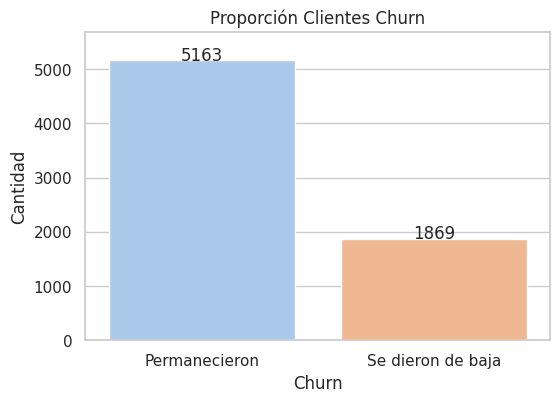

In [154]:
#Distribución variable Churn
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Churn', data=df, palette='pastel')
plt.xticks([0,1], ['Permanecieron','Se dieron de baja'])
plt.title('Proporción Clientes Churn')
plt.ylabel('Cantidad')

# Agregar etiquetas
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 5,
        int(height),
        ha='center'
    )
plt.ylim(0, df['Churn'].value_counts().max()*1.1)
plt.show()


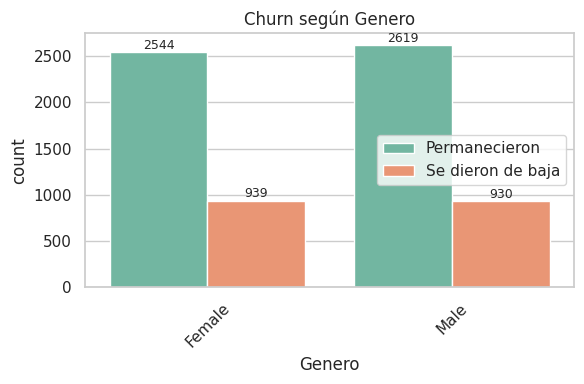

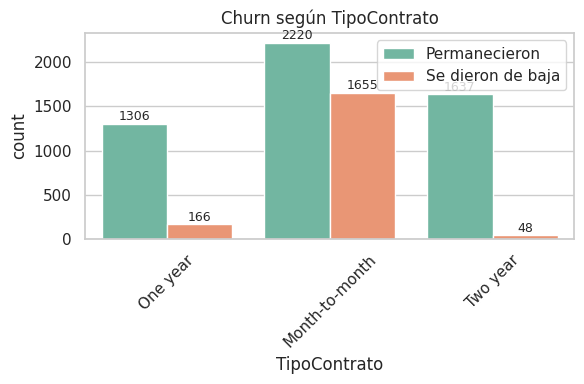

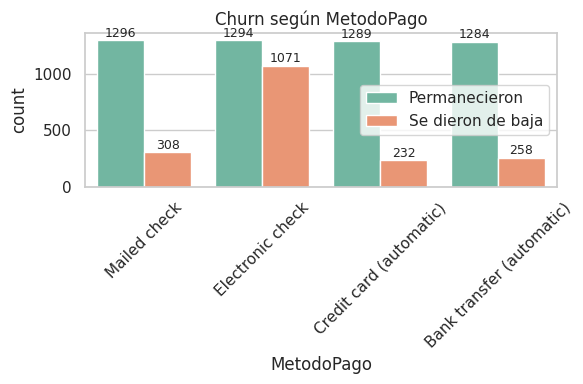

In [156]:
# Churn por variables categóricas
cat_vars = ['Genero','TipoContrato','MetodoPago']
for col in cat_vars:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(x=col, hue='Churn', data=df, palette='Set2')
    plt.title(f'Churn según {col}')
    plt.legend(['Permanecieron','Se dieron de baja'])
    plt.xticks(rotation=45)

    # Agregar etiquetas
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                p.get_x() + p.get_width()/2,
                height + 2,
                int(height),
                ha='center', va='bottom', fontsize=9
            )
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-1718617107.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Churn', y=col, data=df, palette='Set3')


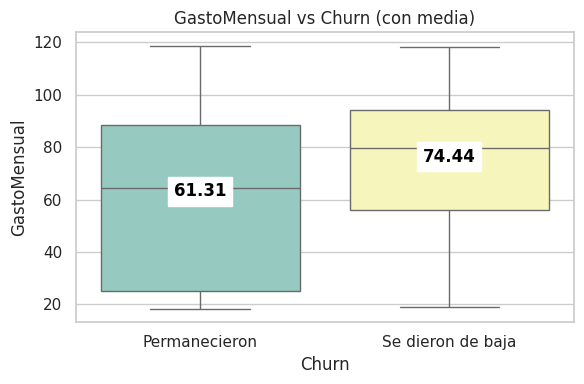

/tmp/ipython-input-1718617107.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Churn', y=col, data=df, palette='Set3')


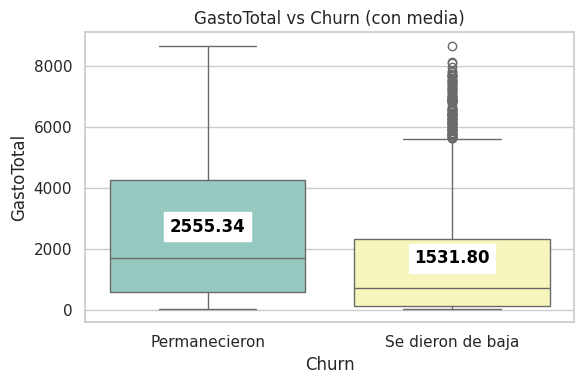

/tmp/ipython-input-1718617107.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Churn', y=col, data=df, palette='Set3')


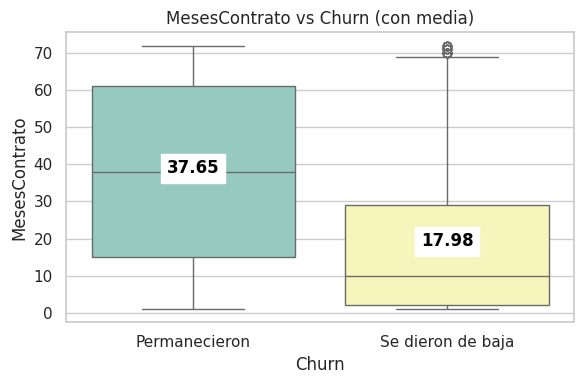

/tmp/ipython-input-1718617107.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Churn', y=col, data=df, palette='Set3')


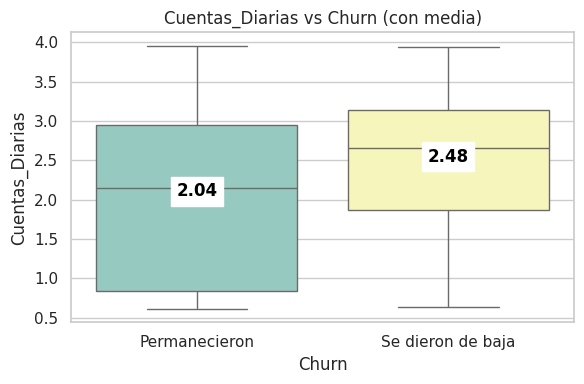

In [159]:
# 5. Churn por variables Numéricas
num_vars = ['GastoMensual','GastoTotal','MesesContrato','Cuentas_Diarias']
for col in num_vars:
    plt.figure(figsize=(6,4))
    ax = sns.boxplot(x='Churn', y=col, data=df, palette='Set3')
    plt.title(f'{col} vs Churn (con media)')
    plt.xticks([0,1], ['Permanecieron','Se dieron de baja'])

    # Calcular media por grupo
    means = df.groupby('Churn')[col].mean()

    # Agregar cada media sobre la caja correspondiente
    for i, m in means.items():
        ax.text(
            i,
            m,
            f'{m:.2f}',
            horizontalalignment='center',
            color='black',
            weight='semibold',
            backgroundcolor='white'
        )

    plt.tight_layout()
    plt.show()

#📄Informe final

## 1. Introducción

El objetivo de este análisis es investigar las posibles causas de la alta tasa de evasión de clientes (Churn) en **Telecom X**. Partiendo de un conjunto de datos que incluye información demográfica, de suscripción a servicios y gasto de los clientes, hemos realizado un flujo completo de ETL y un Análisis Exploratorio de Datos (EDA) para entregar un dataset limpio y extraer insights que permitan al equipo de Ciencia de Datos diseñar modelos predictivos y, a su vez, a la empresa tomar decisiones acertadas para reducir la fuga de usuarios.

---

## 2. Limpieza y Tratamiento de Datos

1. **Extracción**  
   - Los datos se obtuvieron vía una API pública (JSON anidado) y se importaron a un DataFrame de Pandas.  

2. **Expansión de diccionarios anidados**  
   - Columnas como `customer`, `phone`, `internet` y `account` contenían diccionarios; se normalizaron con `pd.json_normalize` y se renombraron para mayor claridad.  

3. **Revisión de consistencia**  
   - Se detectaron y eliminaron filas con valores no válidos en `Churn` (cadenas vacías).  
   - Los campos `GastoMensual` y `GastoTotal` tenían espacios en blanco (`' '`), que se reemplazaron por `NaN` y luego se convirtieron a tipo numérico.  
   - No se encontraron valores duplicados ni nulos tras la limpieza.  

4. **Creación de nuevas variables**  
   - Se agregó `Cuentas_Diarias = GastoMensual / 30`, para comprender el gasto promedio diario de cada cliente.  

5. **Estandarización**  
   - Todas las variables binarias (`Yes`/`No`) se codificaron en `1`/`0`.  
   - Se revisaron y ajustaron los tipos de dato finales: variables categóricas (`object`), numéricas (`int64`, `float64`) y binarias (`int64`).

---

## 3. Análisis Exploratorio de Datos

1. Distribución general de Churn  
- **5163** clientes permanecieron y **1869** se dieron de baja.  

2. Churn según variables categóricas
  #### Género

  - Mujeres: 2544 permanecieron / 939 se fueron
  - Hombres: 2619 permanecieron / 930 se fueron
  - No hay diferencias sustanciales por género.

  #### Tipo de contrato

  - One year: 1306 / 166
  - Month-to-month: 2220 / 1655
  - Two year: 1637 / 48

  #### Método de pago

  - Mailed check: 1296 / 308
  - Electronic check: 1294 / 1071
  - Credit card (automatic): 1289 / 232
  - Bank transfer (automatic): 1284 / 258

3. Variables numéricas vs Churn
  #### Gasto Mensual

  - Permanecieron: rango [20–90], media 61.31
  - Se fueron: rango [55–95], media 74.44
  - Meses de contrato
  - Permanecieron: rango [15–65], media 37.65
  - Se fueron: rango [0–30], media 17.98

---

## 4. Conclusiones e Insights

- Tipo de contrato mes a mes es el factor categórico más asociado al churn.
- Método de pago “Electronic check” muestra alta fuga, posiblemente por falta de retención automatizada.
- Gasto Mensual elevado correlaciona con mayor churn; clientes con facturas caras tienden a cancelar.
- Tenure inferior a 30 meses está muy ligado a abandonar, mientras que la retención crece después de ese umbral.
- No hay brechas significativas de género en la decisión de darse de baja.

---

## 5. Recomendaciones

- Incentivos a contratos de largo plazo (One–year, Two–year) con descuentos o beneficios exclusivos.
- Promociones para clientes con gasto mensual alto: planes personalizados o paquetes de valor agregado.
- Automatizar retención de pagos electrónicos: recordatorios y descuentos por fidelidad.
- Campañas de fidelización en los primeros 30 meses de contrato.
Monitorear Cuentas_Diarias para detectar picos de gasto que anticipen churn.

